# Unsupervised Learning

# 04_create_unsupervised_features

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 28/09/2025   | Adrienne | Created | Created file for unsupervised learning | 
| 29/09/2025   | Martin | New   | Processing to apply the HCPCS code descriptions + EDA on the new descriptions | 
| 02/10/2025 | Adrienne | Update | Built out models

# Notes

- base model just a set of procedures - bare services to treat condition
- model with all procedures (so if you have 3 blood draws it it in there three times)
- Preventative care indicator
- columns for each hcpcs code range
- time between procedures?

# Content

* [Introduction](#introduction)
* [Load Data](#load-data)
* [Additional Features](#additional-features)
* [EDA](#eda)

# Introduction

In [3]:
%load_ext watermark

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load Data

In [ ]:
path = "../data/clean"
#df = pd.read_pickle(f"{path}/patient_level.pkl")
df = pd.read_pickle(f"{path}/patient_level_mini_sample.pkl")

In [225]:

mapper_path = "../data/mappers"
combined_mapper = pd.read_pickle(f"{mapper_path}/combined_mapper.pkl")

# Additional Features

Focusing on transforming the HCPCS codes into a useable format for unsupervised learning.

- HCPCS
  - code
  - category
  - description

## Apply mapper to HCPCS lists

Using the mapper we can apply the additional columns with category and description to each column of HCPCS

In [224]:
# drop hcpcs columns that are all NaN
print(len(df))
df.dropna(axis=1, how='all', inplace=True)
print(len(df))

187303
187303


In [162]:
maxlen = max(df['combined_hcpcs_ls'].str.len())
df_hcpcs = df['combined_hcpcs_ls'].apply(pd.Series)
df_hcpcs = df_hcpcs.add_prefix('hcpcs_')
df_hcpcs = pd.concat([df, df_hcpcs], axis = 1)
df_hcpcs.head()

,patient_medicare_number,patient_first_name,patient_last_name,gender,birthdate,number_of_claims,drg_ls,combined_diagnosis_ls,combined_hcpcs_ls,billablePeriod_start_ls,...,hcpcs_331,hcpcs_332,hcpcs_333,hcpcs_334,hcpcs_335,hcpcs_336,hcpcs_337,hcpcs_338,hcpcs_339,hcpcs_340
1,1S00E00AA10,Brandon214,Roob72,female,1946-01-15,3,[],"[O039, O039, B085, B002, O039, J029]","[G0444, 99241, G0444, G9572]","[2013-04-23, 2016-01-15, 2020-06-02]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1S00E00AA23,B.,Hagene,female,NaN,1,[],"[J329, E785, P292]","[G0444, G9572]",[2014-04-13],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1S00E00AA25,Carlota980,Gamez720,female,1947-04-15,2,[],"[E669, D649, K635, O039, M810, J329, E669, D64...","[G0444, 99241]","[2012-07-18, 2021-11-23]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1S00E00AA32,Denny560,Watsica258,male,1945-06-09,3,[],"[P292, E669, I2510, B349, J329, I10, E669, I25...","[99241, 99241, 99241]","[2015-05-12, 2021-02-20, 2021-03-20]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1S00E00AA54,Lashawnda5,Greenfelder433,female,1950-12-23,11,[],"[E119, R739, E781, E8881, D649, E11319, P292, ...","[G0444, 99241, 99241, 99241, 99241, G0444, 992...","[2012-10-27, 2013-01-26, 2014-06-21, 2014-07-2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_hcpcs.head()

,hcpcs_0,hcpcs_1,hcpcs_2,hcpcs_3,hcpcs_4,hcpcs_5,hcpcs_6,hcpcs_7,hcpcs_8,hcpcs_9,...,hcpcs_331,hcpcs_332,hcpcs_333,hcpcs_334,hcpcs_335,hcpcs_336,hcpcs_337,hcpcs_338,hcpcs_339,hcpcs_340
1,G0444,99241,G0444,G9572,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G0444,G9572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,G0444,99241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,99241,99241,99241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,G0444,99241,99241,99241,99241,G0444,99241,99241,99241,99241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
for i in range(maxlen):
  df_hcpcs = pd.merge( df_hcpcs, 
    combined_mapper,
    left_on=f"hcpcs_{i}",
    right_on="code",
    how='left'
  )
  df_hcpcs = df_hcpcs.drop(['code'], axis=1)
  df_hcpcs = df_hcpcs.rename({
    'category': f"category_{i}",
    'description': f"description_{i}",
  }, axis=1)

df_hcpcs_combined = df_hcpcs.fillna(np.nan)

In [154]:
df_hcpcs_combined[['hcpcs_1', 'category_1', 'description_1', 'hcpcs_2', 'category_2',  'description_2']].head()

,hcpcs_1,category_1,description_1,hcpcs_2,category_2,description_2
0,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes,G0444,HCPCS_level_2,Procedures/Professional Services
1,G9572,HCPCS_level_2,Procedures/Professional Services,NaN,NaN,NaN
2,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes,NaN,NaN,NaN
3,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes
4,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes,99241,HCPCS_level_1,Evaluation and Management (E/M) Codes


In [164]:
df_hcpcs_combined.head()

,patient_medicare_number,patient_first_name,patient_last_name,gender,birthdate,number_of_claims,drg_ls,combined_diagnosis_ls,combined_hcpcs_ls,billablePeriod_start_ls,...,category_336,description_336,category_337,description_337,category_338,description_338,category_339,description_339,category_340,description_340
0,1S00E00AA10,Brandon214,Roob72,female,1946-01-15,3,[],"[O039, O039, B085, B002, O039, J029]","[G0444, 99241, G0444, G9572]","[2013-04-23, 2016-01-15, 2020-06-02]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1S00E00AA23,B.,Hagene,female,NaN,1,[],"[J329, E785, P292]","[G0444, G9572]",[2014-04-13],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1S00E00AA25,Carlota980,Gamez720,female,1947-04-15,2,[],"[E669, D649, K635, O039, M810, J329, E669, D64...","[G0444, 99241]","[2012-07-18, 2021-11-23]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1S00E00AA32,Denny560,Watsica258,male,1945-06-09,3,[],"[P292, E669, I2510, B349, J329, I10, E669, I25...","[99241, 99241, 99241]","[2015-05-12, 2021-02-20, 2021-03-20]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1S00E00AA54,Lashawnda5,Greenfelder433,female,1950-12-23,11,[],"[E119, R739, E781, E8881, D649, E11319, P292, ...","[G0444, 99241, 99241, 99241, 99241, G0444, 992...","[2012-10-27, 2013-01-26, 2014-06-21, 2014-07-2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Time interval between claims

Using `billablePeriod_end_ls`, sort and compare the time interval of days between each claim. Then expand it out into individual columns

In [47]:
def days_between_claim(item):
  sorted_dates = pd.to_datetime(pd.Series(item)).sort_values().reset_index(drop=True)
  return sorted_dates.diff().dt.days.dropna().astype(int).tolist()

In [48]:
day_interval = pd.DataFrame(df['billablePeriod_end_ls'].apply(days_between_claim))
day_maxlen = max(day_interval['billablePeriod_end_ls'].str.len())
df_day_interval = pd.DataFrame(day_interval['billablePeriod_end_ls'].to_list(), columns=[f"day_interval_{i}" for i in range(day_maxlen)])
df_day_interval.head()

,day_interval_0,day_interval_1,day_interval_2,day_interval_3,day_interval_4,day_interval_5,day_interval_6,day_interval_7,day_interval_8,day_interval_9,...,day_interval_73,day_interval_74,day_interval_75,day_interval_76,day_interval_77,day_interval_78,day_interval_79,day_interval_80,day_interval_81,day_interval_82
0,997.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2111.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,511.0,35.0,931.0,595.0,462.0,147.0,21.0,273.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

## Breakdown of procedures

NOTE: This is on the `claim_mini_sample` dataset (10,000 entries)

- Most common description of procedures done are:
  1. Evaluation and Management (E/M) Codes (HCPCS Level I)
  2. Procedures/Professional Services (HCPCS Level II)
- Other codes include
  1. Alcohol and Drug Abuse Treatment
  2. National Codes Established for State Medicaid Agencies

In [23]:
def countplot_with_labels(l, title):
  ax = sns.countplot(l, palette='pastel')

  for p in ax.patches:
    ax.text(
      p.get_width() + 1,
      p.get_y() + p.get_height() / 2,
      int(p.get_width()),
      ha="center",
      va="center",
      color="black",
      fontsize=12,
      fontweight="bold"
    )
  
  plt.title(title)

  return plt

In totality, what is the distribution of HCPCS codes across all claims

In [24]:
all_hcpcs = df['combined_hcpcs_ls'].explode().reset_index()
all_hcpcs = all_hcpcs.merge(
  combined_mapper,
  left_on='combined_hcpcs_ls',
  right_on='code',
  how='left'
)
all_hcpcs = all_hcpcs.drop(['index', 'code'], axis=1)
all_hcpcs = all_hcpcs.fillna("Unknown")

C:\Users\User\AppData\Local\Temp\ipykernel_1032\2240585470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(l, palette='pastel')


<module 'matplotlib.pyplot' from 'd:\\MADS\\SIADS 696 - Milestone II\\siads_696_mII\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

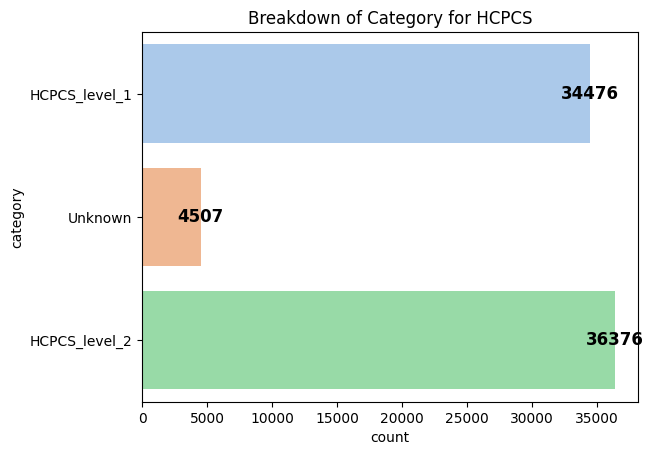

In [183]:
countplot_with_labels(all_hcpcs['category'], "Breakdown of Category for HCPCS")

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_63434/2240585470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(l, palette='pastel')


<module 'matplotlib.pyplot' from '/Users/adriennemartz/Library/Mobile Documents/com~apple~CloudDocs/MADS/SIADS 696 Milestone II/git_repo/siads_696_mII/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

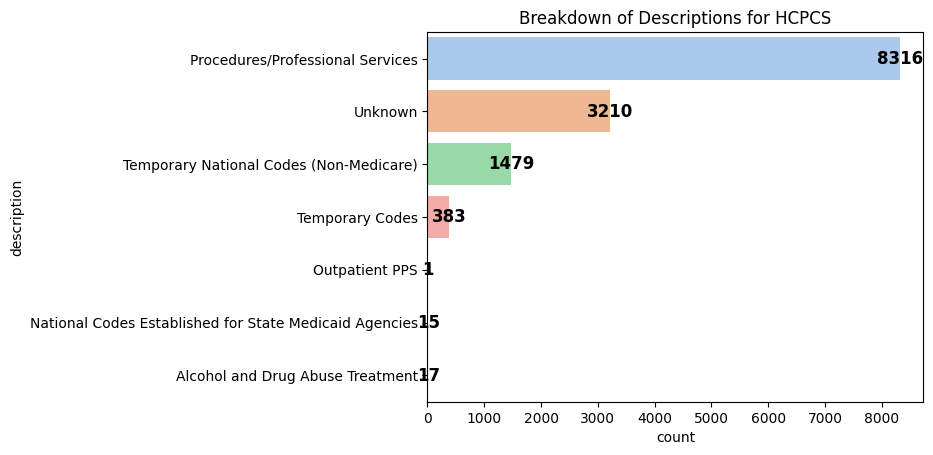

In [25]:
countplot_with_labels(all_hcpcs['description'], "Breakdown of Descriptions for HCPCS")

Compare for the first and second HCPCS, what are the most common category of procedures done

In [26]:
df_plot = df_hcpcs_combined[['description_0', 'description_1']]
df_plot.head()

,description_0,description_1
0,Procedures/Professional Services,NaN
1,Procedures/Professional Services,Procedures/Professional Services
2,Procedures/Professional Services,NaN
3,NaN,NaN
4,Procedures/Professional Services,NaN


/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_63434/2240585470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(l, palette='pastel')


<module 'matplotlib.pyplot' from '/Users/adriennemartz/Library/Mobile Documents/com~apple~CloudDocs/MADS/SIADS 696 Milestone II/git_repo/siads_696_mII/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

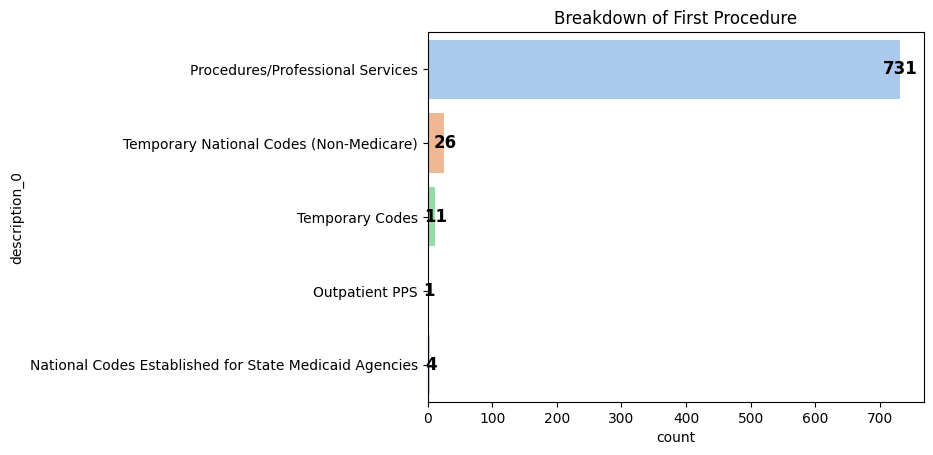

In [27]:
countplot_with_labels(df_plot['description_0'], "Breakdown of First Procedure")

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_63434/2240585470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(l, palette='pastel')


<module 'matplotlib.pyplot' from '/Users/adriennemartz/Library/Mobile Documents/com~apple~CloudDocs/MADS/SIADS 696 Milestone II/git_repo/siads_696_mII/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

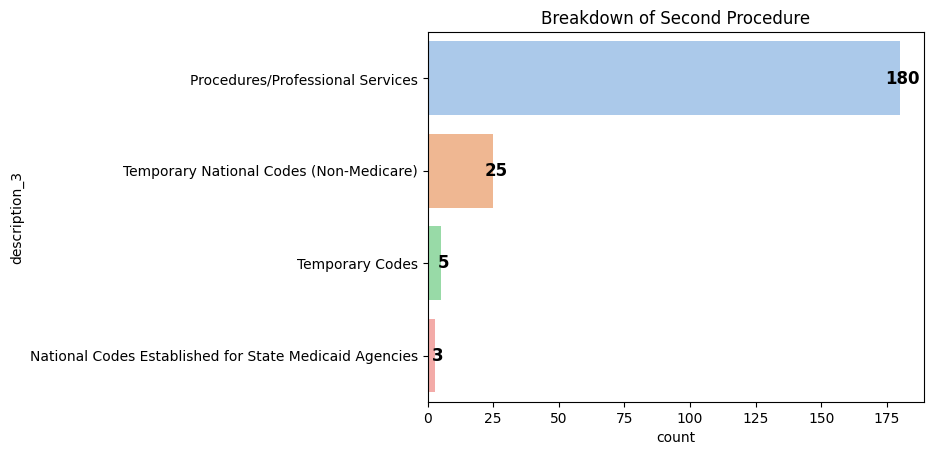

In [28]:
countplot_with_labels(df_hcpcs_combined['description_3'], "Breakdown of Second Procedure")

## How long between claim submissions

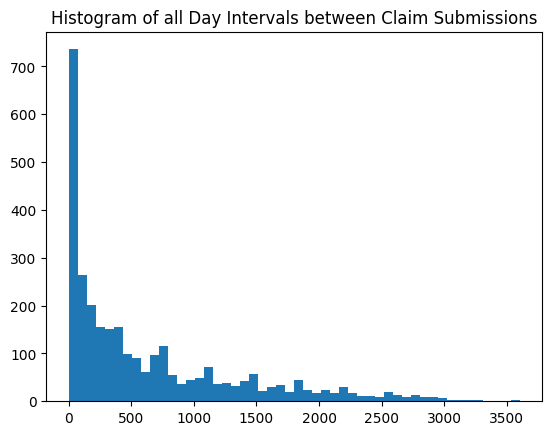

In [29]:
plt.hist(day_interval.explode('billablePeriod_end_ls'), bins=50)
plt.title("Histogram of all Day Intervals between Claim Submissions")
plt.show()

Text(0.5, 1.0, 'How long between the first and second claim submissions in Days')

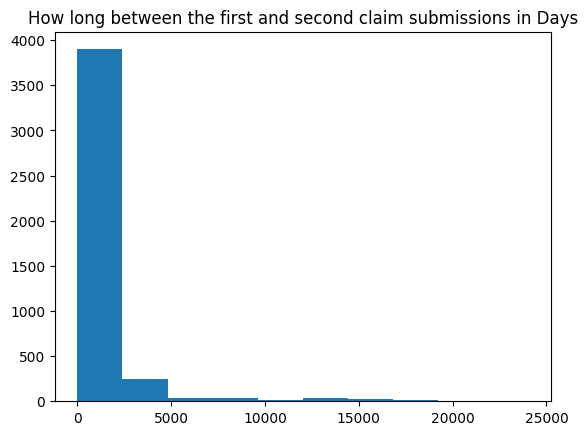

In [211]:
plt.hist(df_day_interval['day_interval_0'])
plt.title('How long between the first and second claim submissions in Days')

## Variable Encoding

Will make three datasets with three different versions of the features:
- df_lab_enc: will have the hcpcs columns encoded using label encoding
- df_freq_enc: will have the hcpcs columns encoded using frequency encoding
- df_TD_enc: will use the combined_hcpcs_ls column and treat it like a bag of words problem and use a TD-IDF transformation

In [204]:
# create copies of the dataset
df_lab_enc = df_hcpcs_combined.copy()
df_freq_enc = df_hcpcs_combined.copy()
df_TD_enc = df_hcpcs_combined.copy()

In [ ]:
# create a list of hcpcs columns
# first col in list needs to be dropped
hcpcs_cols = df_lab_enc.columns[df_lab_enc.columns.str.contains("hcpcs")][1:]

# create a dataframe of unique hcpcs values for encoding
ls = list(set(value for sublist in df_hcpcs_combined['combined_hcpcs_ls'] for value in sublist))
# new hcpcs columns are filled with nan
ls.append(np.nan)
df_unique_hcpcs = pd.DataFrame( {'unique_hcpcs': ls})


Label Encoding

In [208]:
# create instance of label encoder
le = LabelEncoder()
# perform label encoding on first hcpcs column
le.fit(df_unique_hcpcs['unique_hcpcs'])
 
# apply same encoder to rest of columns
for col in hcpcs_cols:
    df_lab_enc[col + '_enc'] = le.transform(df_lab_enc[col])


In [226]:
# check encodings
df_lab_enc[['hcpcs_0', 'hcpcs_0_enc', 'hcpcs_1', 'hcpcs_1_enc', 'hcpcs_2', 'hcpcs_2_enc']].head()

,hcpcs_0,hcpcs_0_enc,hcpcs_1,hcpcs_1_enc,hcpcs_2,hcpcs_2_enc
0,G0444,17,99241,1,G0444,17
1,G0444,17,G9572,21,NaN,39
2,G0444,17,99241,1,NaN,39
3,99241,1,99241,1,99241,1
4,G0444,17,99241,1,99241,1


In [ ]:
df_lab_enc = df_lab_enc.drop(hcpcs_cols, axis = 1)

In [220]:
df_lab_enc.to_pickle("../data/clean/patient_level_lab_enc.pkl")

Frequency Encoded

In [ ]:
%watermark